# b-17 >>> b-23

In [9]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

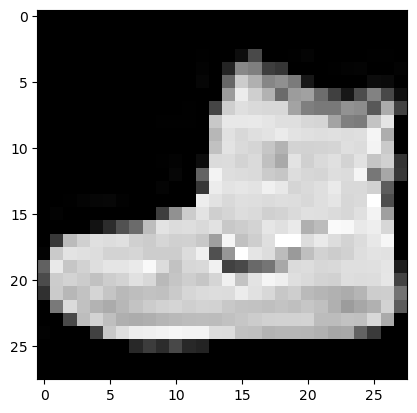

In [15]:
plt.imshow(x_train[0,], cmap="gray")

# Normalize Data

In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1744910456.138455   24672 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2020 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [20]:
weights, bias = model.layers[1].get_weights()

In [21]:
weights

array([[-0.0124925 ,  0.03249547, -0.01894712, ...,  0.02926205,
         0.04600506,  0.05837797],
       [-0.07945894, -0.07952632,  0.00352331, ..., -0.0677285 ,
        -0.0226579 , -0.02277118],
       [ 0.03591266, -0.02799299,  0.04911454, ..., -0.03735683,
        -0.05943017,  0.03547247],
       ...,
       [ 0.05078147,  0.01833081, -0.0793376 , ...,  0.04754207,
        -0.06762208,  0.04877453],
       [-0.08147737,  0.00347044,  0.03818386, ...,  0.07679759,
        -0.01133731, -0.06403212],
       [ 0.0013887 , -0.02279406,  0.03860216, ...,  0.02934606,
         0.0759616 , -0.04380238]], shape=(784, 100), dtype=float32)

In [22]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile Model

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Model

In [24]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50


2025-04-17 20:50:57.498489: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159936000 exceeds 10% of free system memory.
2025-04-17 20:50:57.590424: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159936000 exceeds 10% of free system memory.
I0000 00:00:1744910457.953578   25232 service.cc:148] XLA service 0x7571900054f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744910457.953598   25232 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 SUPER, Compute Capability 7.5
2025-04-17 20:50:57.963660: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744910457.998429   25232 cuda_dnn.cc:529] Loaded cuDNN version 90800


 110/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2761 - loss: 2.1271

I0000 00:00:1744910458.637566   25232 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6349 - loss: 1.1345 - val_accuracy: 0.8123 - val_loss: 0.5412
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8159 - loss: 0.5284 - val_accuracy: 0.8322 - val_loss: 0.4812
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8358 - loss: 0.4641 - val_accuracy: 0.8356 - val_loss: 0.4584
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8500 - loss: 0.4335 - val_accuracy: 0.8300 - val_loss: 0.4762
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8546 - loss: 0.4108 - val_accuracy: 0.8529 - val_loss: 0.4126
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8613 - loss: 0.3989 - val_accuracy: 0.8562 - val_loss: 0.4140
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8678 - loss: 0.3801 - val_accuracy: 0.8626 - val_loss: 0.3899
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8691 - loss: 0.3718 - val_accurac

In [25]:
history.history

{'accuracy': [0.7382549047470093,
  0.8225882649421692,
  0.8384509682655334,
  0.8490784168243408,
  0.8552352786064148,
  0.8615686297416687,
  0.8654705882072449,
  0.8686666488647461,
  0.87147057056427,
  0.8739607930183411,
  0.8773529529571533,
  0.8802353143692017,
  0.8820000290870667,
  0.8836863040924072,
  0.8867254853248596,
  0.8882744908332825,
  0.8901764750480652,
  0.8925686478614807,
  0.8923921585083008,
  0.8943137526512146,
  0.8961960673332214,
  0.898254930973053,
  0.8986666798591614,
  0.9008235335350037,
  0.9020980596542358,
  0.9029215574264526,
  0.9050784111022949,
  0.9064313769340515,
  0.9073137044906616,
  0.9086078405380249,
  0.9097254872322083,
  0.9110000133514404,
  0.9113921523094177,
  0.9137254953384399,
  0.9136666655540466,
  0.9143137335777283,
  0.9161568880081177,
  0.9167255163192749,
  0.9174705743789673,
  0.918647050857544,
  0.920098066329956,
  0.9206666946411133,
  0.9200588464736938,
  0.922529399394989,
  0.9229215979576111,
  0.

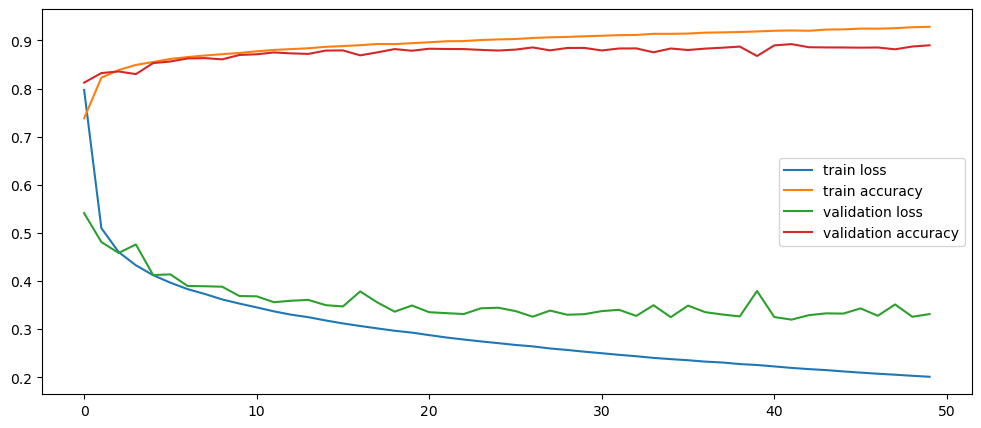

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

# Evaluate Test Model

In [27]:
model.evaluate(x_test, y_test, verbose=0)

[0.3554648160934448, 0.8808000087738037]

In [28]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

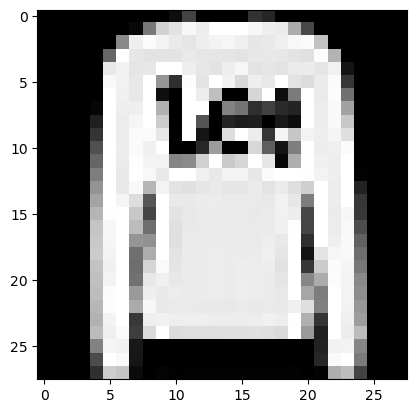

In [29]:
plt.imshow(x3[0], cmap="gray")

In [30]:
model.predict(x3).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


array([[0.   , 0.   , 0.948, 0.   , 0.052, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [31]:
model.predict(x3).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


(2, 10)

In [32]:
np.argmax(model.predict(x3),  axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([2, 1])

In [33]:
 y_test[1:3]

array([2, 1], dtype=uint8)